In [ ]:
pip install openpiv

In [ ]:
from openpiv import tools, validation, filters, scaling, pyprocess
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from ipywidgets import interact_manual, interactive, fixed, IntSlider, HBox, VBox, Layout

In [ ]:
frame_a  = tools.imread( 'exp1_001_b.bmp' )
frame_b  = tools.imread( 'exp1_001_c.bmp' )

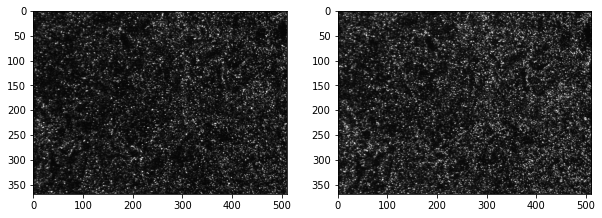

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,8))
ax[0].imshow(frame_a,cmap=plt.cm.gray)
ax[1].imshow(frame_b,cmap=plt.cm.gray)


In [ ]:
winsize = 32 # interrogation window size in frame A
searchsize = 38  # search in image B
overlap = 12 # 50% overlap
dt = 0.02 # time interval between pulses
u0, v0, sig2noise = pyprocess.extended_search_area_piv(frame_a.astype(np.int32), 
                                  frame_b.astype(np.int32), window_size=winsize, overlap=overlap, 
                                  dt=dt, search_area_size=searchsize, sig2noise_method='peak2peak')
#coordinates of vector field
x, y = pyprocess.get_coordinates( image_size=frame_a.shape, search_area_size=searchsize, overlap=overlap )
u1, v1, mask = validation.sig2noise_val( u0, v0, sig2noise, threshold = 1.05 )
u2, v2 = filters.replace_outliers( u1, v1, method='localmean', max_iter=3, kernel_size=3)

In [ ]:
x, y, u3, v3 = scaling.uniform(x, y, u2, v2, scaling_factor = 96.52 )
x, y, u3, v3 = tools.transform_coordinates(x, y, u3, v3)

In [ ]:
tools.save(x, y, u3, v3, mask, 'exp1_001.txt' )

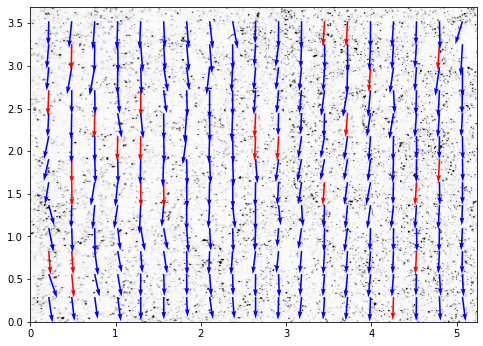

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
tools.display_vector_field('exp1_001.txt', ax=ax, scaling_factor=96.52, scale=50, 
                           width=0.0035, on_img=True, image_name='exp1_001_b.bmp');